In [1]:
#Import libraries, display plot in the notebook
%matplotlib inline
import pandas as pd

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Read Data files and Explore Contents

In [2]:
titles_path = \
"/home/isaac/Dropbox/Pandas/pycon-pandas-tutorial/data/titles.csv"

cast_path = \
"/home/isaac/Dropbox/Pandas/pycon-pandas-tutorial/data/cast.csv"

release_path = \
"/home/isaac/Dropbox/Pandas/pycon-pandas-tutorial/data/release_dates.csv"

In [3]:
titles = pd.read_csv(titles_path)
cast = pd.read_csv(cast_path)
release = pd.read_csv(release_path)

In [4]:
titles.head()

,title,year
0,Anashim Ketumim,2013
1,Ritu,2014
2,Nelumbo,2016
3,Black to White,2013
4,Godsalt,2014


In [5]:
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [6]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


### 2. Warm-ups

In [7]:
#Check the length of the dataframe
len(titles)

234375

In [8]:
#Get head
h = titles.head(10)
h

,title,year
0,Anashim Ketumim,2013
1,Ritu,2014
2,Nelumbo,2016
3,Black to White,2013
4,Godsalt,2014
5,Conrack,1974
6,Find a Way,2013
7,Kamandag sa araw,1987
8,Chal Chalein,2009
9,A Good Day to Die Hard,2013


In [9]:
#Get the tail
t = titles.tail(10)
t

,title,year
234365,Coma,2014
234366,Narendran Makan Jayakanthan Vaka,2001
234367,Where Thunder Reigns,2016
234368,Vidas Estranhas,1968
234369,Proud to Be a Sikh,2014
234370,Yenti Bava Mareenu,1993
234371,Il conte Max,1957
234372,Heimat-Fragmente: Die Frauen,2006
234373,The Vanquished,1953
234374,Blood in Eden,2017


In [10]:
titles.columns

Index(['title', 'year'], dtype='object')

In [11]:
#Convert years to decades
h.year // 10 * 10

0    2010
1    2010
2    2010
3    2010
4    2010
5    1970
6    2010
7    1980
8    2000
9    2010
Name: year, dtype: int64

In [12]:
#Filtering
h[h.year >= 2005]

,title,year
0,Anashim Ketumim,2013
1,Ritu,2014
2,Nelumbo,2016
3,Black to White,2013
4,Godsalt,2014
6,Find a Way,2013
8,Chal Chalein,2009
9,A Good Day to Die Hard,2013


In [13]:
#Combined filter, and doesn't work here
h[(h.year >= 2005) and (h.year <=2010) ]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [14]:
# Use & for and
h[(h.year >= 2005) & (h.year <=2010) ]

,title,year
8,Chal Chalein,2009


In [15]:
# Use | for or
h[(h.year <= 2005) | (h.year >=2010) ]

,title,year
0,Anashim Ketumim,2013
1,Ritu,2014
2,Nelumbo,2016
3,Black to White,2013
4,Godsalt,2014
5,Conrack,1974
6,Find a Way,2013
7,Kamandag sa araw,1987
9,A Good Day to Die Hard,2013


In [16]:
#Select all the movies with the name Macbeth
t = titles
t[t.title == "Macbeth"]

,title,year
21652,Macbeth,2015
27859,Macbeth,2003
45120,Macbeth,2013
53709,Macbeth,1916
87382,Macbeth,2004
97756,Macbeth,2017
105546,Macbeth,2014
109611,Macbeth,1987
115457,Macbeth,2009
136197,Macbeth,2012


In [17]:
#Sort the table by column's value
t[t.title == "Macbeth"].sort_values(by="year").head()

,title,year
222186,Macbeth,1913
53709,Macbeth,1916
227219,Macbeth,1948
109611,Macbeth,1987
227155,Macbeth,1997


In [18]:
#Sort the table by column's value
t[t.title == "Macbeth"].sort_values(by="year", ascending=False)

,title,year
97756,Macbeth,2017
21652,Macbeth,2015
105546,Macbeth,2014
45120,Macbeth,2013
136197,Macbeth,2012
115457,Macbeth,2009
190616,Macbeth,2006
87382,Macbeth,2004
27859,Macbeth,2003
183168,Macbeth,1998


In [19]:
#Drop na and filter by multiple columns
c = cast.dropna().head(100)
c.sort_values(["year", "n"], ascending=False)

,title,year,name,type,character,n
54,Candie's Harem,2015,Andrew 'Shotgun' Smith,actor,TV narrator,51.0
140,Spy,2015,50 Cent,actor,Himself,45.0
172,The Vixens,2015,Brandon A. Wright,actor,Officer Chode,29.0
43,Using,2015,Johnny 'Koolout' Starks,actor,Randall Dawson,10.0
9,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
57,Josephine Doe,2015,Michael 'Stake' Morton III,actor,Cashier,8.0
149,Z,2015,Zapata 666,actor,Z,1.0
90,Angry Video Game Nerd: The Movie,2014,Sergeant 16-bit,actor,AVGN Webcam Fan,382.0
154,Angry Video Game Nerd: The Movie,2014,92soothsayer,actor,AVGN Webcam Fan,381.0
18,Step Up All In,2014,Jesse 'Casper' Brown,actor,Grim Knight Dancer,61.0


In [20]:
#Not null
cast.n.notnull().head()

0     True
1    False
2     True
3     True
4    False
Name: n, dtype: bool

In [21]:
#Is null
cast.n.isnull().head()

0    False
1     True
2    False
3    False
4     True
Name: n, dtype: bool

In [22]:
# Series should use .order not sort
cast.n.dropna().order(ascending=False).head()

2396208    33613.0
2552361      999.0
3000293      999.0
628654       999.0
2382559      938.0
Name: n, dtype: float64

In [23]:
# df should use sort_values
cast.dropna().sort_values("n",ascending=False).head()

,title,year,name,type,character,n
2396208,Tribulation,2000,Marium Carvell,actress,Selma Davis,33613.0
628654,Rift,2011,Leon Fazzio,actor,Henry,999.0
2552361,Rift,2011,Catherine Fitzlanders,actress,Matty,999.0
3000293,Rift,2011,Brittany Alexis Phillips,actress,Erica,999.0
2382559,Lloyd,2001,Lisa Calvillo,actress,Spaghetti Spectator,938.0


### 3. Drill 1

In [24]:
### How many movies are listed in the titles dataframe?
len(titles)

234375

In [25]:
### What are the earliest two films listed in the titles dataframe?
titles.sort_values("year").head(2)

,title,year
77349,Miss Jerry,1894
141504,The Startled Lover,1898


In [26]:
### How many movies have the title "Hamlet"?
len(titles[titles.title == "Hamlet"])

20

In [27]:
### How many movies are titled "North by Northwest"?
len(titles[titles.title == "North by Northwest"])

1

In [28]:
### When was the first movie titled "Hamlet" made?
titles[titles.title == "Hamlet"].sort_values("year").head(1)

,title,year
221639,Hamlet,1910


In [29]:
### List all of the "Treasure Island" movies from earliest to most recent.
titles[titles.title == "Treasure Island"].sort_values("year")

,title,year
129482,Treasure Island,1918
177032,Treasure Island,1920
40168,Treasure Island,1934
93285,Treasure Island,1950
48753,Treasure Island,1972
79322,Treasure Island,1973
223825,Treasure Island,1985
62983,Treasure Island,1999


In [30]:
### How many movies were made in the year 1950?
len(titles[titles.year == 1950])

1108

In [31]:
### How many movies were made in the year 1960?
len(titles[titles.year == 1960])

1522

In [32]:
### How many movies were made from 1950 through 1959?
len(titles[(titles.year // 10 * 10) == 1950])

12838

In [33]:
### How many movies were made from 1950 through 1959?
### Alternatively
len(titles[(titles.year >= 1950) & (titles.year <= 1959)])

12838

In [34]:
### In what years has a movie titled "Batman" been released?
titles[titles.title == "Batman"].year

33079     1943
104831    1989
Name: year, dtype: int64

In [35]:
### How many roles were there in the movie "Inception"?
len(cast[cast.title == "Inception"].character.unique())

51

In [36]:
### How many roles in the movie "Inception" are NOT ranked by an "n" value?
len(cast[cast.title == "Inception"][cast[cast.title == "Inception"].n.isnull()])

21

In [37]:
### But how many roles in the movie "Inception" did receive an "n" value?
len(cast[cast.title == "Inception"][cast[cast.title == "Inception"].n.notnull()])

51

In [38]:
###The above example need to align the dataframe, e.g. below is wrong
cast[cast[cast.title == "Inception"].n.notnull()]

IndexingError: Unalignable boolean Series key provided

In [ ]:
### Display the cast of "North by Northwest" in their correct "n"-value order, ignoring roles that did not earn a numeric "n" value.
c = cast.dropna()
c[c.title == "North by Northwest"].sort_values("n")

In [ ]:
### Display the entire cast, in "n"-order, of the 1972 film "Sleuth".
cast[(cast.title == "Sleuth") & (cast.year == 1972)].sort_values("n")

In [39]:
### Now display the entire cast, in "n"-order, of the 2007 version of "Sleuth".
cast[(cast.title == "Sleuth") & (cast.year == 2007)].sort_values("n")

,title,year,name,type,character,n
288503,Sleuth,2007,Michael Caine,actor,Andrew,1.0
1147041,Sleuth,2007,Jude Law,actor,Milo,2.0
1602268,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0
228757,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
330751,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
2406761,Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
2958823,Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


In [40]:
### How many roles were credited in the silent 1921 version of Hamlet?
len(cast[(cast.title == "Hamlet") & (cast.year == 1921)])

9

In [41]:
### How many roles were credited in Branagh’s 1996 Hamlet?
len(cast[(cast.title == "Hamlet") & (cast.year == 1996)])

55

In [42]:
### How many "Hamlet" roles have been listed in all film credits through history?
len(cast[(cast.character == "Hamlet")])

81

In [43]:
### How many people have played an "Ophelia"?
len(cast[(cast.character == "Ophelia")].name.unique())

94

In [44]:
### The below answer has duplicates
len(cast[(cast.character == "Ophelia")])

96

In [45]:
### How many people have played a role called "The Dude"?
len(cast[(cast.character == "The Dude")].name.unique())

16

In [46]:
### How many people have played a role called "The Stranger"?
len(cast[(cast.character == "The Stranger")].name.unique())

184

In [47]:
### How many roles has Sidney Poitier played throughout his career?
len(cast[(cast.name == "Sidney Poitier")])

43

In [48]:
### How many roles has Judi Dench played?
len(cast[(cast.name == "Judi Dench")])

51

In [49]:
### List the supporting roles (having n=2) played by Cary Grant in the 1940s, in order by year.
cast[(cast.name == "Cary Grant") & (cast.n == 2) & (cast.year // 10 * 10 == 1940)].sort_values("year")

,title,year,name,type,character,n
773493,My Favorite Wife,1940,Cary Grant,actor,Nick,2.0
773503,Penny Serenade,1941,Cary Grant,actor,Roger Adams,2.0


In [50]:
### List the leading roles that Cary Grant played in the 1940s in order by year.
cast[(cast.name == "Cary Grant") & (cast.n == 1) & (cast.year // 10 * 10 == 1940)].sort_values("year")

,title,year,name,type,character,n
773518,The Howards of Virginia,1940,Cary Grant,actor,Matt Howard,1.0
773475,His Girl Friday,1940,Cary Grant,actor,Walter Burns,1.0
773520,The Philadelphia Story,1940,Cary Grant,actor,C. K. Dexter Haven,1.0
773508,Suspicion,1941,Cary Grant,actor,Johnnie,1.0
773522,The Talk of the Town,1942,Cary Grant,actor,Leopold Dilg,1.0
773499,Once Upon a Honeymoon,1942,Cary Grant,actor,Patrick 'Pat' O'Toole,1.0
773466,Destination Tokyo,1943,Cary Grant,actor,Capt. Cassidy,1.0
773491,Mr. Lucky,1943,Cary Grant,actor,Joe Adams,1.0
773492,Mr. Lucky,1943,Cary Grant,actor,Joe Bascopolous,1.0
773500,Once Upon a Time,1944,Cary Grant,actor,Jerry Flynn,1.0


In [51]:
### How many roles were available for actors in the 1950s?
len(cast[(cast.year // 10 == 195) & (cast.type == "actor")])

147951

In [52]:
### How many roles were avilable for actresses in the 1950s?
len(cast[(cast.year // 10 == 195) & (cast.type == "actress")])

53969

In [53]:
### How many leading roles (n=1) were available from the beginning of film history through 1980?
len(cast[(cast.n == 1) & (cast.year <= 1980)])

61444

In [54]:
### How many non-leading roles were available through from the beginning of film history through 1980?
len(cast[(cast.n != 1) & (cast.year <= 1980)])

1047877

In [55]:
### How many roles through 1980 were minor enough that they did not warrant a numeric "n" rank?
len(cast[(cast.year <= 1980)][cast[(cast.year <= 1980)].n.isnull()])

415167

### 4.Lecture

In [56]:
#String operation: .str.
t = titles
#Start with Hamlet
t[t.title.str.startswith("Hamlet")].head()

,title,year
4158,Hamlet,2017
13646,Hamlet,1990
14175,Hamlet,2011
17566,Hamlet Unbound,2012
18760,Hamlet (II),2015


In [57]:
t[t.title.str.contains("Hamlet")].head()

,title,year
919,"Harry, Hamlet and I",2013
1248,"Han, hun og Hamlet",1922
4158,Hamlet,2017
7672,"Dogg's Hamlet, Cahoot's Macbeth",2005
13646,Hamlet,1990


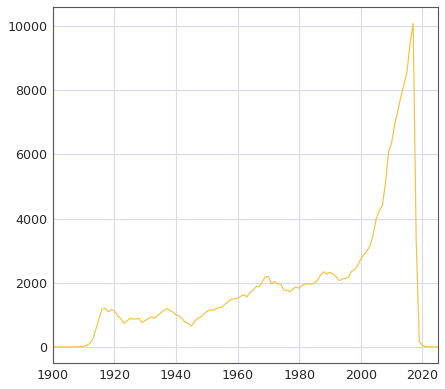

In [58]:
#Value counts
#Sort based on pandas index
t.year.value_counts().sort_index().plot(xlim=(1900,2025), color = "#F7C242")

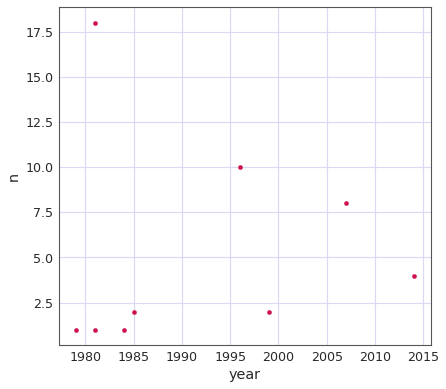

In [59]:
c = cast
c = c[c.character == "Kermit the Frog"]
c.plot(x = "year", y = "n", kind = "scatter", color = "#D0104C")

### 5. Drill 2

In [60]:
### What are the ten most common movie names of all time?
t = titles
t.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 15
The Outsider            12
Maya                    12
Temptation              11
The Three Musketeers    11
Othello                 11
Freedom                 11
She                     10
Name: title, dtype: int64

In [61]:
### Which three years of the 1930s saw the most films released?
t[t.year //10 == 193].year.value_counts().head(3)

1937    1200
1936    1142
1938    1138
Name: year, dtype: int64

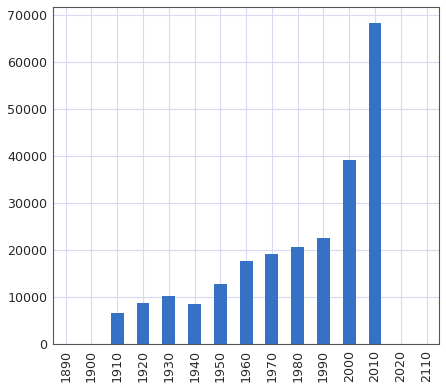

In [62]:
### Plot the number of films that have been released each decade over the history of cinema.
t["decade"] = t.year // 10 * 10
t.decade.value_counts().sort_index().plot(kind="bar")

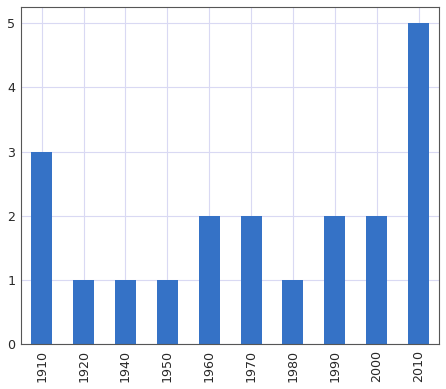

In [63]:
### Plot the number of "Hamlet" films made each decade.
t[t.title=="Hamlet"].decade.value_counts().sort_index().plot(kind="bar")

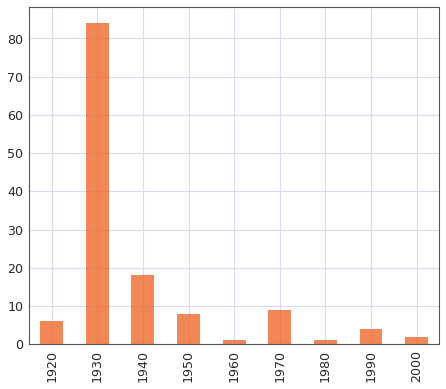

In [64]:
### Plot the number of "Rustler" characters in each decade of the history of film.
c = cast
c = c[c.character == "Rustler"]
(c.year // 10 * 10).value_counts().sort_index().plot(kind="bar", alpha=0.75, color = "#F05E1C")

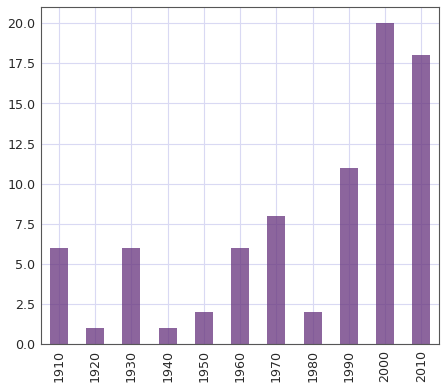

In [65]:
### Plot the number of "Hamlet" characters each decade.
c = cast
c = c[c.character == "Hamlet"]
(c.year // 10 * 10).value_counts().sort_index().plot(kind="bar", alpha=0.75, color = "#66327C")

In [66]:
### What are the 11 most common character names in movie history?
c = cast
c.character.value_counts().head(11)

Himself        18926
Dancer         11015
Extra           8638
Reporter        7593
Doctor          6803
Policeman       6470
Student         6390
Nurse           6127
Bartender       6123
Minor Role      5830
Party Guest     5820
Name: character, dtype: int64

In [67]:
### Who are the 10 people most often credited as "Herself" in film history?
c = cast
c[c.character == "Herself"].name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Mary Jo Pehl            7
Joan Rivers             7
Caroline Rhea           5
Chris Evert             5
Lili?n Garc?a           5
Sally Jessy Raphael     5
Rekha                   5
Name: name, dtype: int64

In [68]:
### Who are the 10 people most often credited as "Himself" in film history?
c[c.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Franklin D. Roosevelt    20
Bill Clinton             20
George W. Bush           20
Winston Churchill        20
Martin Luther King       19
Name: name, dtype: int64

In [69]:
### Which actors or actresses appeared in the most movies in the year 1945?
c[c.year == 1945].name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      28
Bess Flowers       28
Nolan Leary        27
Name: name, dtype: int64

In [70]:
### Which actors or actresses appeared in the most movies in the year 1985?
c[c.year == 1985].name.value_counts().head()

Shakti Kapoor    19
Mammootty        17
Sukumari         16
Lou Scheimer     15
Aruna Irani      14
Name: name, dtype: int64

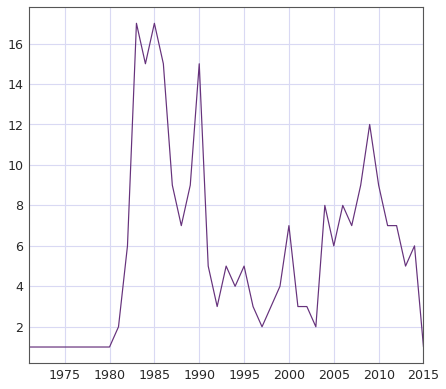

In [71]:
### Plot how many roles Mammootty has played in each year of his career.
c[c.name == "Mammootty"].year.value_counts().sort_index().plot(color = "#66327C")

In [72]:
### What are the 10 most frequent roles that start with the phrase "Patron in"?
c[c.character.str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in restaurant             3
Patron in Quiet Bar              2
Name: character, dtype: int64

In [73]:
### What are the 10 most frequent roles that start with the word "Science"?
c[c.character.str.contains("Science")].character.value_counts().head(10)

Science Teacher                            53
The Science Fair Contestants & Families     9
Science Student                             8
Science Fair Student                        8
Science Fair Judge                          6
Science Club Member                         5
Science Reporter                            5
Science Promo Cadet                         4
Science Kid                                 4
Member of 'Science Fucktion'                3
Name: character, dtype: int64

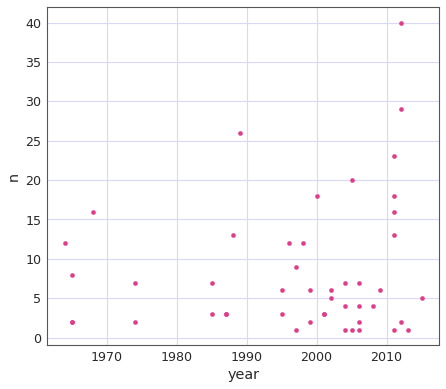

In [74]:
### Plot the n-values of the roles that Judi Dench has played over her career.
c = cast
c = c[c.name == "Judi Dench"].sort_values("year")
c = c[c.n.notnull()]
c.plot(x="year", y="n", color="#E03C8A", kind="scatter")

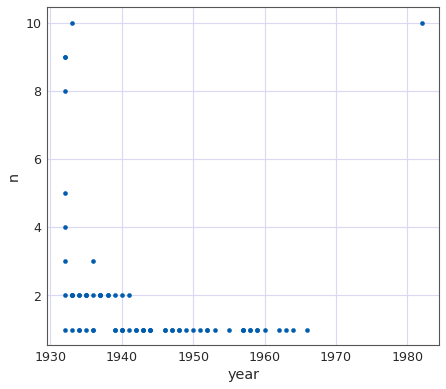

In [75]:
### Plot the n-values of Cary Grant's roles through his career.
c = cast
c = c[c.name == "Cary Grant"].sort_values("year")
c = c[c.n.notnull()]
c.plot(x="year", y="n", color = "#005CAF", kind = "scatter")

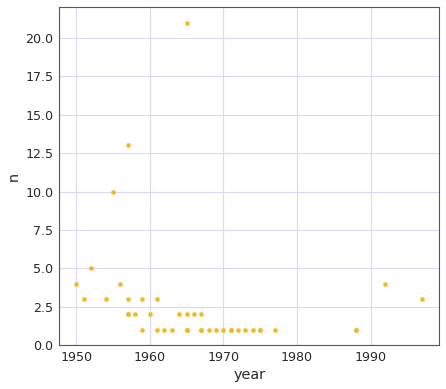

In [76]:
### Plot the n-value of the roles that Sidney Poitier has acted over the years.
c = cast
c = c[c.name == "Sidney Poitier"].sort_values("year")
c = c[c.n.notnull()]
c.plot(x="year", y="n", color="#EFBB24", kind="scatter")

In [77]:
### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?
c = cast
c = c[c.n == 1]
c_actor = c[c.type == "actor"]
len(c_actor[c_actor.year // 10 == 195])

6375

In [78]:
c_actress = c[c.type == "actress"]
len(c_actress[c_actress.year // 10 == 195])

2813

In [79]:
### I like the answer here better
c = cast
c = c[c.n == 1]
c = c[c.year // 10 == 195]
c.type.value_counts()

actor      6375
actress    2813
Name: type, dtype: int64

In [80]:
### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?
c = cast
c = c[c.n == 2]
c = c[c.year // 10 == 195]
c.type.value_counts()

actress    4399
actor      4377
Name: type, dtype: int64